#Autoregression AR (Box-Jenquis)

## 1 Libraries

In [5]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

## 2 Database

In [6]:
db=pd.read_csv("Netflix_stock_history.csv")
db

,Date,Close
0,5/23/2002,1.196429
1,5/24/2002,1.210000
2,5/28/2002,1.157143
3,5/29/2002,1.103571
4,5/30/2002,1.071429
...,...,...
4865,9/20/2021,575.429993
4866,9/21/2021,573.140015
4867,9/22/2021,590.650024
4868,9/23/2021,593.260010


<Axes: >

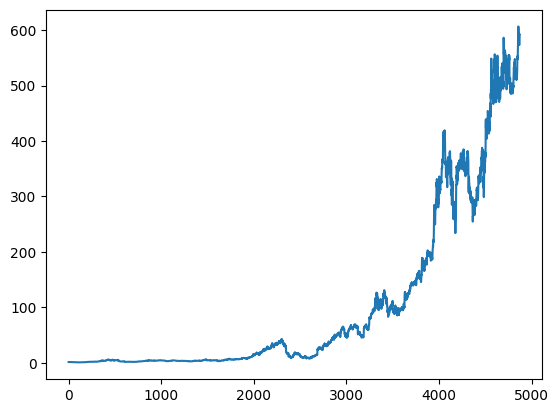

In [7]:
db["Close"].plot()

## 3 Stationarity (the stability of the variable -mean and variance-)

In [8]:
from statsmodels.tsa.stattools import adfuller
test_stationarity=adfuller(db["Close"],autolag="AIC")
print("P-Value: ", test_stationarity[1])

P-Value:  0.9990812682590767


tsa - times series analysis

adfuller - **augmented Dickay and Fuller** its a test toknow if a variable or model is stationary

if the result is less than 0.005 it means that the data can be described or predycted by a regression model because is more stable

Pronosticating the change on close price (beneficios, goods earned (?))

##3.1 First diff

shift(1) valor anterior

In [23]:
db["Close_returns"]=db["Close"]-db["Close"].shift(1)

In [24]:
db

,Date,Close,Close_returns
0,5/23/2002,1.196429,NaN
1,5/24/2002,1.210000,0.013571
2,5/28/2002,1.157143,-0.052857
3,5/29/2002,1.103571,-0.053572
4,5/30/2002,1.071429,-0.032142
...,...,...,...
4865,9/20/2021,575.429993,-13.919983
4866,9/21/2021,573.140015,-2.289978
4867,9/22/2021,590.650024,17.510010
4868,9/23/2021,593.260010,2.609985


In [26]:
test_stationarity_2=adfuller(db["Close_returns"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  2.5123294254031683e-23


## 4 Partial autocorrelation funtion PAC

Now we are going to check and generate a analisys.

Toda serie tiene memoria, el proceso tiene un orden y la influencia que tiene el tiempo. Ahora se va aentender la dependencia del orden para poder crear un pronóstico

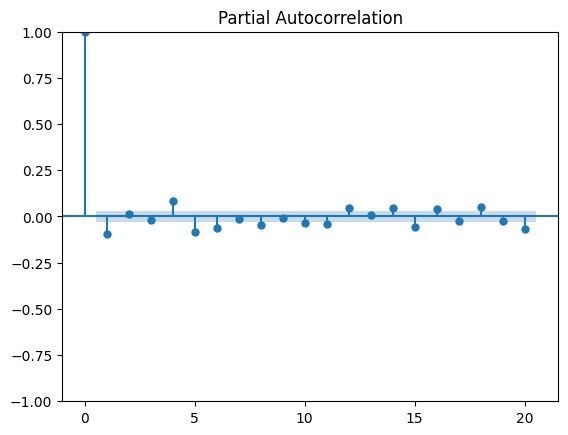

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["Close_returns"].dropna(), lags=20)

## 5 Autoregressive model

In [10]:
from statsmodels.tsa.ar_model import AutoReg

In [39]:
modelAR_2=AutoReg(db["Close_returns"].dropna(),lags=8).fit()
print(modelAR_2.summary())

                            AutoReg Model Results                             
Dep. Variable:          Close_returns   No. Observations:                 4869
Model:                     AutoReg(8)   Log Likelihood              -14272.857
Method:               Conditional MLE   S.D. of innovations              4.560
Date:                Tue, 29 Aug 2023   AIC                          28565.713
Time:                        00:44:03   BIC                          28630.603
Sample:                             8   HQIC                         28588.488
                                 4869                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1485      0.066      2.264      0.024       0.020       0.277
Close_returns.L1    -0.0912      0.014     -6.364      0.000      -0.119      -0.063
Close_returns.L2     0.0128 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## 6 Predictions

In [37]:
pred_2=modelAR_2.predict(dynamic=False)
pred_2

1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
4865    3.786157
4866    0.789568
4867   -1.054584
4868   -1.012116
4869         NaN
Length: 4869, dtype: float64

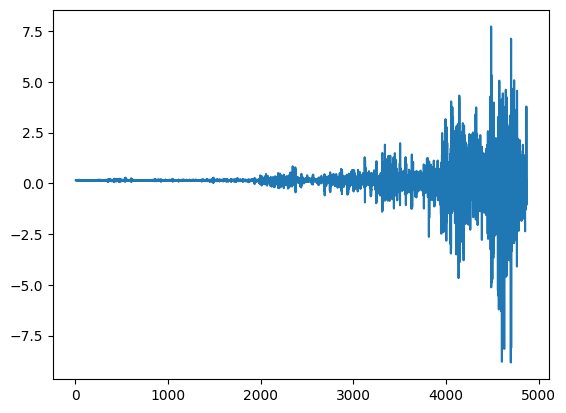

In [38]:
plt.plot(pred_2)

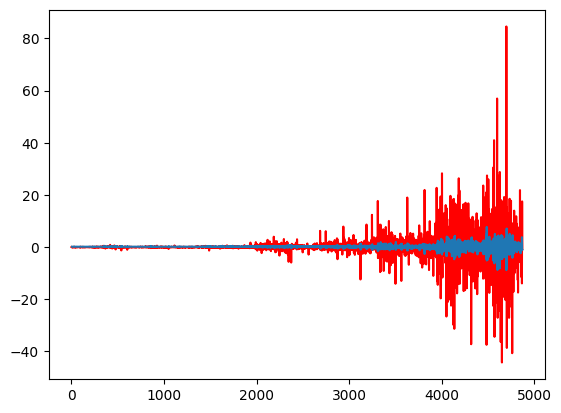

In [40]:
from matplotlib import pyplot
pyplot.plot(db["Close_returns"].dropna(),color="red")
pyplot.plot(pred_2)

# Moving Average MA